# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning **based solution that can help in shortlisting the candidates having higher chances of VISA approval**. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist **have to analyze the data provided and, with the help of a classification model**:

* **Facilitate the process of visa approvals.**
* **Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.**


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

# To filter the warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# import libraries for plots and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [2]:
# Loading the dataset EasyVisa.csv
data = pd.read_csv("EasyVisa.csv")

# Copying data to another variable(df) to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# Viewing the first  5 rows of the dataset.
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [4]:
# Viewing the last  5 rows of the dataset.
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

**Observations:**
 * The above rows in this dataset shows data of employees coming from Asian and African continents with highschool,bachelors or Masters degrees.
 * We also notice from the above rows that there are very old established companies as far as 1897 that are seeking to bring foreign workers into the United States.

In [5]:
# Checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

**Observations:**
* There are 25480 rows and 12 columns in this dataset.

#### Checking the data types of the columns for the dataset.

In [6]:
# Returns information about the DataFrame
# including the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

**Observations:**
* There are **3 numerical(integer or float) data type columns**.The **no_of_employees and  yr_of_estab** are **integer(int64)** data type columns.The **prevailing_wage** is a **float(float64)** data type column.
* There are **9 object data type columns**.The **case_id, continent, education_of_employee, has_job_experience , requires_job_training, region_of_employment, unit_of_wage, full_time_position and case_status** are **object data type** columns.
* There are non-null(or no missing) values in the dataset.
* There are many columns that are of object data type i.e. strings.These need to be converted to categorical data type.

#### Fixing the data types

In [7]:
# Converting object data type columns into categorical columns
for feature in df.columns:  # Loop through all columns in the DataFrame
    if df[feature].dtype == "object":  # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])

# Checking the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

**Observations:**
* All the object data type columns have been converted to categorical columns.
* There are now 3 numerical columns and 9 categorical columns.
* Memory usage has reduced from 2.3+ MB to 2.0 MB

**Missing Values Check**

In [8]:
# Checking for missing values in the dataset
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* There are no missing values in this dataset.

**Duplicates Entry Check**

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observations:**
* There are no duplicated entries in this dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Summary of the dataset.

In [10]:
# Returns the statistical summary of the numerical columns the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

**Observations:**

* The year the employer's companies were established ranges from 1800 to 2016.
* The average wage paid to similarly employed workers in a specific occupation in the area of intended employment(i.e prevailing_wage variable) ranges from 2.1367	to  319210.27 dollars.The huge difference between the 75th percentile and the max value suggest they might be outliers in this variable.
* It is noticed that the number of employees in the employer's company ranges from -26 to 602069.The negative sign(-) of the minimum number of employees doesn't make sense,as there can't be minus number of employees in a company.This has to be fixed before further analysis is done as this might be an error while taking the data.

In [11]:
# Printing the number of rows of "no_of_employees" column with a negative value
print(df.loc[df["no_of_employees"] < 0].shape[0])

# Viewing the rows of "no_of_employees" column with a negative value
df.loc[df["no_of_employees"] < 0]

33


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

**Observation:**
* There are 33 rows of the "no_of_employees" column that have a negative value.This implies that there are 33 values in the "no_of_employees" column that have a negative sign.This will be fixed by taking their absolute values.

In [12]:
# Converts all the negative values of the "no_of_employees" column to positive
# values by taking the absolute values of that column
df["no_of_employees"] = abs(df["no_of_employees"])

# Checking rows of "no_of_employees" with a negative value
print(df[df["no_of_employees"] < 0].shape[0])


0


<IPython.core.display.Javascript object>

**Observation:**
* There a no more negative values in the "no_of_employees" column.

In [13]:
# Returns the statistical summary of the categorical columns of data
df.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

In [14]:
# Making a list of all categorical variables
cat_col = df.select_dtypes(include="category").columns.tolist()

# Printing unique values in each column
for column in cat_col:
    print(df[column].value_counts())
    print("*" * 40)

EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
****************************************
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
****************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
****************************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64
****************************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64
****************************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

**Observations:**
* There are 25480 applicants(employees or candidates) in this dataset.
* Employees in this dataset come from **6 unique continents**:**Asia, Europe, North America, South America, Africa and Oceania**.A large number(majority) of employees come from Asia(the top continent).
* There are **4 unique educational levels** in this dataset of employees:**Bachelor's, Master's, HighSchool and Doctorate**.The most common educationel level in this dataset is Bachelor's degree.
* There are more employees in this dataset who have job experience than those that do not have any job experience.
* There is a large majority of employees in this dataset that **do not** require a job training than those that require a job training.
* There are **5 regions of employment** the foreign worker in this dataset intends to work at.They are **the Northeast ,South, West, Midwest, and Island regions**.The region of employment with the highest number of employees is the **Northeast region of the US**.
* Unit of prevailing wage(unit_of_wage) **have only 5 unique values:Hourly, Weekly, Monthly, and Yearly.** The most common is the **Yearly**.
* There more employees  in this dataset going in for full-time positions to  than part time positions.
* There are more(majority of) employees or candidates that were certified for a visa than employees or candidates that were denied the visa. 

In [15]:
# Checking for the number of unique values in case_id column
df.case_id.nunique()

25480

<IPython.core.display.Javascript object>

**Observations:**
* Since all the values in case_id column are unique,it can be dropped as it doesn't add any value to the model.

In [16]:
# Dropping the Booking_ID column
df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="autumn"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="dashed"
    )  # Add mean to the histogram (broken green line)
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram (red line)

<IPython.core.display.Javascript object>

#### No_of_employees

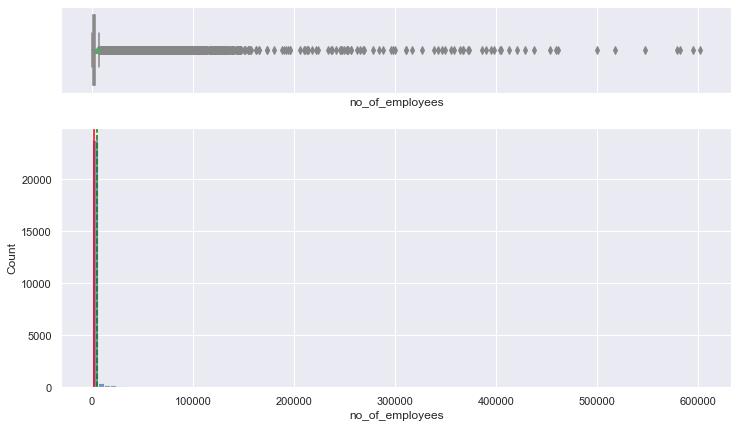

<IPython.core.display.Javascript object>

In [18]:
# Creating a boxplot and histogram for the "no_of_employees" variable
# inorder to see the shape its data distribution
histogram_boxplot(df, "no_of_employees", bins=100)

**Observations:**
* The distribution of the no_of_employees variable is highly right-skewed.
* There are outliers towards the right.
* There are many observations of number of employees less than 2000 employees  and we also have some observations of companies having above 500000 employees.

#### Prevailing_wage

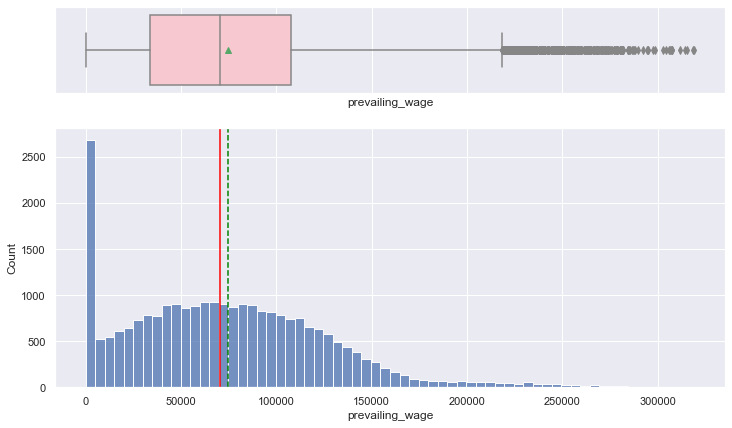

<IPython.core.display.Javascript object>

In [19]:
# Creating a boxplot and histogram for the "prevailing_wage" variable
# inorder to see the shape its data distribution
histogram_boxplot(df, "prevailing_wage")

In [20]:
# Finding the rows of "prevailing_wage" column with less than 100 wages
df[df["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


<IPython.core.display.Javascript object>

* There are 176 employees which have less than 100 prevailing wage.

In [21]:
# Finding the count of unit wage of those employees
# that have less than 100 prevailing wage that is which unit wage do these
# prevailing wages(< 100) belong to
df[df["prevailing_wage"] < 100]["unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* The distribution of prevailing_wage variable is right-skewed.
* There are outliers towards the right.
* The prevailing wages of less than 100 dollars are the hourly unit wage which makes sense.

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=40, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="tab10",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Yr_of_estab

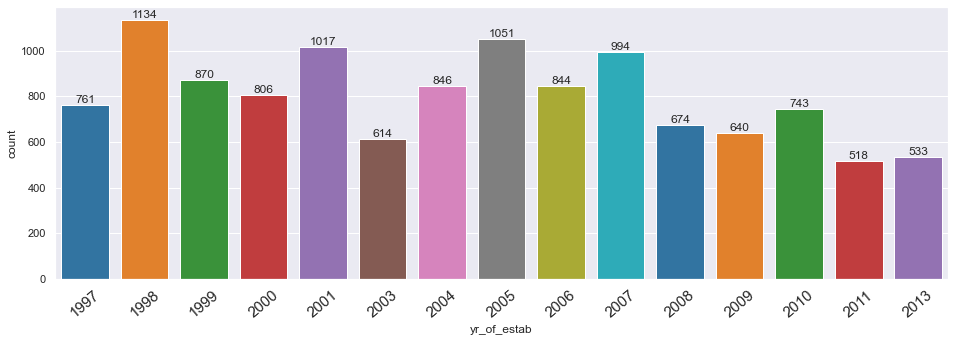

<IPython.core.display.Javascript object>

In [23]:
# Creating a labeled barplot of yr_of_estab variable
# Viewing the top 15 years
labeled_barplot(df, "yr_of_estab", n=15)

In [24]:
# Finding the count of each Year in which the employer's company
# was established
df.yr_of_estab.value_counts()

1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* The employer's companies in this dataset were established in 199 unique years.
* A majority of candidates in this dataset went in for employer's companies that was established in the year 1998 ,followed by the year 2005.

#### Continent

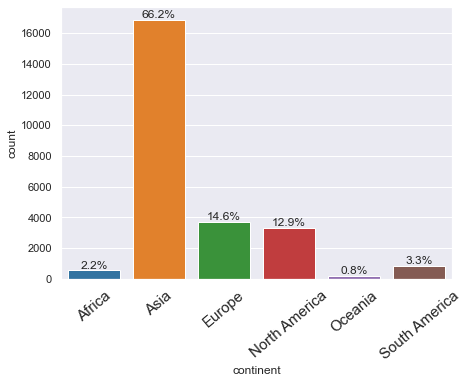

<IPython.core.display.Javascript object>

In [25]:
# Creating a labeled barplot of continent variable
labeled_barplot(df, "continent", perc=True)

**Observations:**
* **Most(a large majority of) employees/candidates(66.2%)** come from the asian continent.
* 14.6% of candidates/employees come from Europe.
* 12.9% of candidates/employees come from North America.
* 3.3% of candidates/employees come from South America.
* 2.2% of candidates/employees come from Africa.
* 0.8%(the least number) of candidates/employees come from Oceania.

#### Education_of_employee

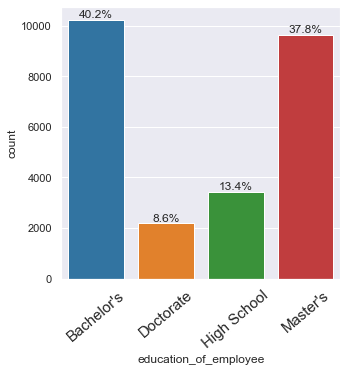

<IPython.core.display.Javascript object>

In [26]:
# Creating a labeled barplot of education_of_employee variable
labeled_barplot(df, "education_of_employee", perc=True)

**Observations:**
* **Most(40.2% of)** candidates/employees in this dataset have Bachelor's degree.
* **37.8% of** candidates/employees have Master's degree.
* **13.4% of** candidates/employees have High School education.
* **8.6% of** candidates/employees(which represents the least) have a Doctorate degree.

#### Has_job_experience

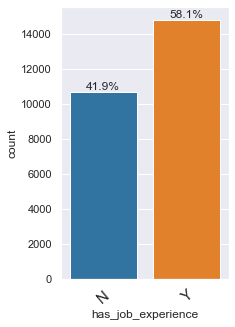

<IPython.core.display.Javascript object>

In [27]:
# Creating a labeled barplot of has_job_experience variable
labeled_barplot(df, "has_job_experience", perc=True)

**Observations:**
* There are more candidates/employees in this dataset that have a job experience than those that do not have a job experience.
* **58.1% of employees** in this dataset have a job experience.
* **41.9% of employees** in this dataset **do not have** a job experience.


#### Requires_job_training

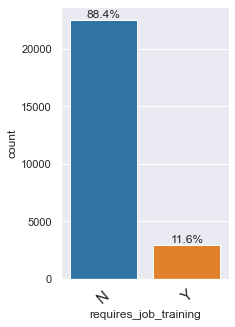

<IPython.core.display.Javascript object>

In [28]:
# Creating a labeled barplot of requires_job_training variable
labeled_barplot(df, "requires_job_training", perc=True)

**Observations:**
* There are more(a large majority of) candidates/employees in this dataset that **do not require a job training** than those that require a job training.
* **88.4% of employees** in this dataset **do not require** a job training.
* **11.6% of employees** in this dataset **require** a job training.


#### Region_of_employment

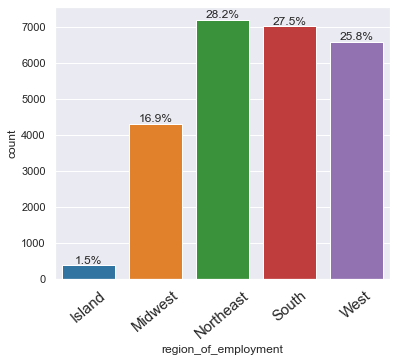

<IPython.core.display.Javascript object>

In [29]:
# Creating a labeled barplot of region_of_employment variable
labeled_barplot(df, "region_of_employment", perc=True)

**Observations:**
* **28.2%(most)** of employees/candidates in this dataset intends to be employed in the **Northeast region** in the US.
* **27.5%** of employees/candidates in this dataset intends to be employed in the **South** region in the US.
* **25.8%** of employees/candidates in this dataset intends to be employed in the **West** region in the US.
* **16.9%** of employees/candidates in this dataset intends to be employed in the **Midwest** region in the US.
* **1.5%(the least number)** of employees/candidates in this dataset intends to be employed in the **Island region** in the US.


#### Unit_of_wage

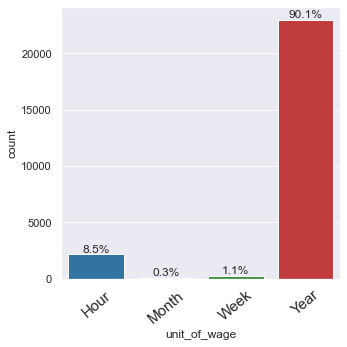

<IPython.core.display.Javascript object>

In [30]:
# Creating a labeled barplot of unit_of_wage variable
labeled_barplot(df, "unit_of_wage", perc=True)

**Observations:**

* **Most(90.1% that is majority of)** prevailing wages in this dataset are  **yearly** unit wage.This makes sense there were large values observed on prevailing wage.
* 8.5%  prevailing wages in this dataset are **hourly** unit wage.
* 1.1% prevailing wages in this dataset are  **weekly** unit wage.
* 0.3% prevailing wages in this dataset are **monthly** unit wage.


#### Full_time_position

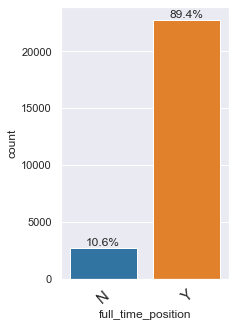

<IPython.core.display.Javascript object>

In [31]:
# Creating a labeled barplot of full_time_position variable
labeled_barplot(df, "full_time_position", perc=True)

**Observations:**
* There a more(a large majority) candidates/employees in this dataset going in for the full time work position than part time work position.
* **89.4%** of candidates/employees go in for **the full time work position**.
* **10.6%** of candidates/employees go in for **the part time work position**.

#### Case_status

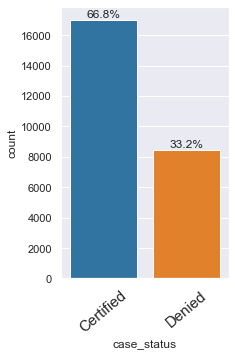

<IPython.core.display.Javascript object>

In [32]:
# Creating a labeled barplot of case_status variable
labeled_barplot(df, "case_status", perc=True)

**Observations:**
* There are more visas in this dataset certified than visas denied.
* **66.8%** of visas in this dataset was **certified.**
* **33.2%** of visas in this dataset was **denied.**

### Bivariate Analysis

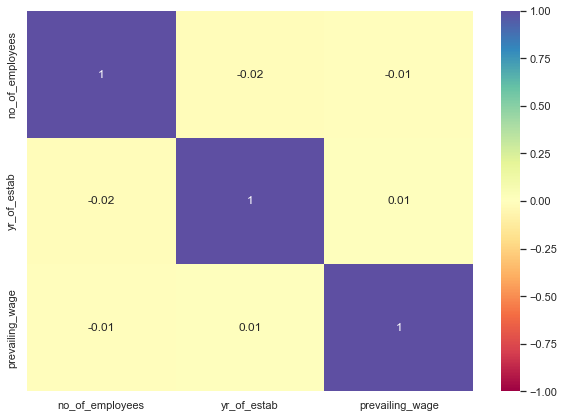

<IPython.core.display.Javascript object>

In [33]:
# Plotting the heatmap to check correlation amongst numerical variables.
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.show()

**Observations:**
* There is no significant correlation observed amongst numerical variables. 

In [34]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Q.1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?** 


#### Case_status vs Education_of_employee

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


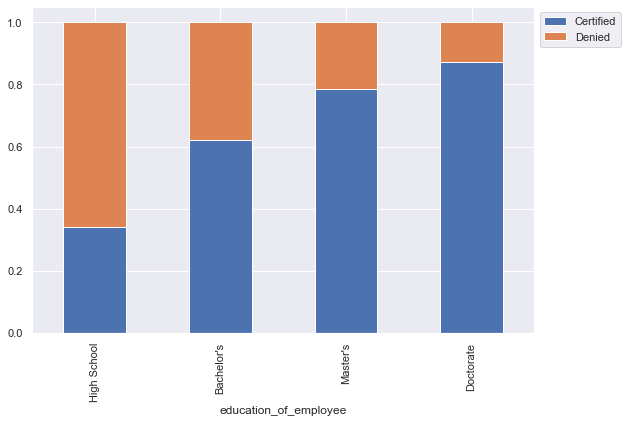

<IPython.core.display.Javascript object>

In [35]:
# Plotting a stacked bar plot of Case_status vs Education_of_employee
stacked_barplot(df, "education_of_employee", "case_status")

**Observations:**

The above plot shows that:
* Majority of  employees/candidates in this dataset with high school education were denied a visa.**Employees with high school education are more likely to be denied the visa as compared to employees with Bachelor's,Master's or Doctorate education**.
* Majority of employees in this dataset with Bachelor's degree were certified a visa.
* Majority of employees in this dataset with Master's degree were certified a visa.
* A large majority of employees in this dataset with Doctorate degree were certified a visa.That is,**employees/candidates with a doctorate education are more likely to be certified visa as compared to employees with lower education that is highschool,bachelor's, or master's education**.

**Q.2. How does the visa status vary across different continents?**

#### Case_status vs Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


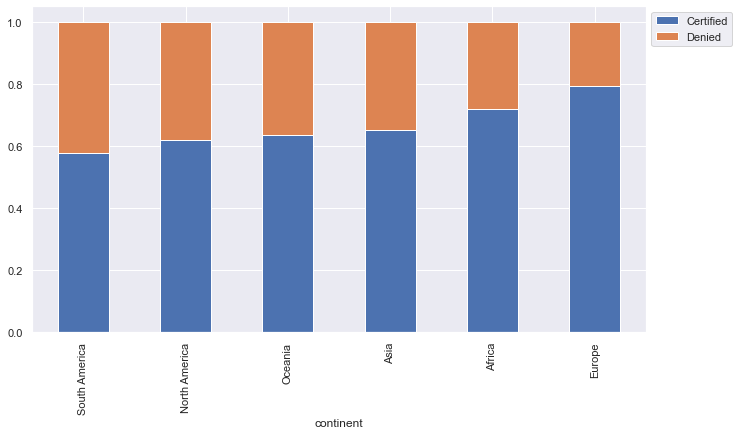

<IPython.core.display.Javascript object>

In [36]:
# Plotting a stacked bar plot of Case_status vs Continent
stacked_barplot(df, "continent", "case_status")

**Observations:**

The above plot shows that:
* There are no significant difference of employees coming from North America, Oceania and Asia with respect to their visa status.
* However,**employees or candidates coming from Europe are more likely to be certified a visa** compared to employees/candidates coming from other continents(South America,North America,Oceania,Asia and Africa).
* On the other hand,employees or applicants coming from South America are more likely to be denied visa compared to other continents.

**Q.3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?** 

#### Case_status vs Has_job_experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


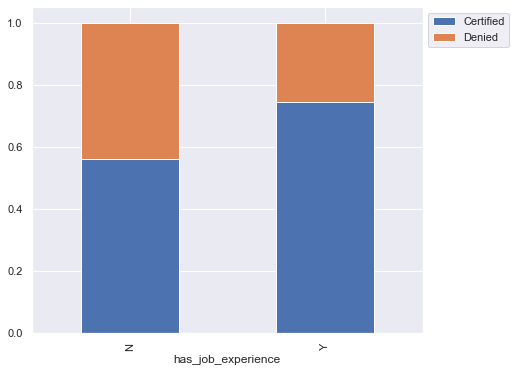

<IPython.core.display.Javascript object>

In [37]:
# Plotting a stacked bar plot of Case_status vs has_job_experience
stacked_barplot(df, "has_job_experience", "case_status")

**Observations:**

* The above plot shows that **employees with work experience are more likely to be certified a visa** as compared to employees without work experience. 

 **How does the visa status vary across different regions?**

#### Case_status vs Region_of_employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


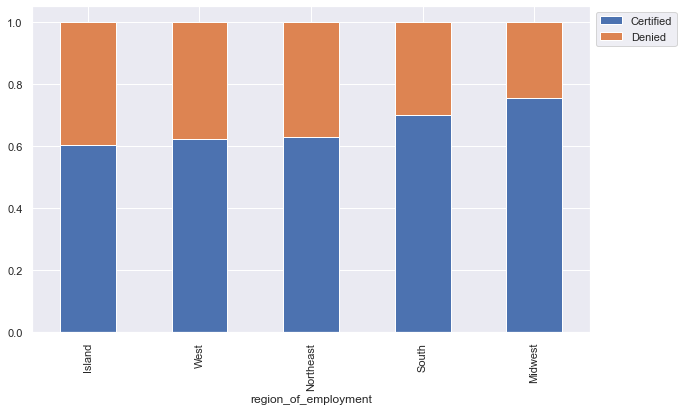

<IPython.core.display.Javascript object>

In [38]:
# Plotting a stacked bar plot of Case_status vs Region_of_employment
stacked_barplot(df, "region_of_employment", "case_status")

**Observations:**

The above plot shows that:
* There are no significant difference of Island,West and Northeast regions with respect to visa status.
* However,employees/candidates intending to be employed at **Midwest region** are **more likely to be certified for a visa as compared** to employees/candidates intending to be employed in **other regions(Island,West,Northeast and South)**.
* On the other hand,employees/candidates intending to be employed at **Island region** are **more likely to be denied for a visa as compared** to employees/candidates intending to be employed in **other regions(Midwest,West,Northeast and South)**.

**Does position of work (full-time or part-time) influence visa status?**

#### Case_status vs Full_time_position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


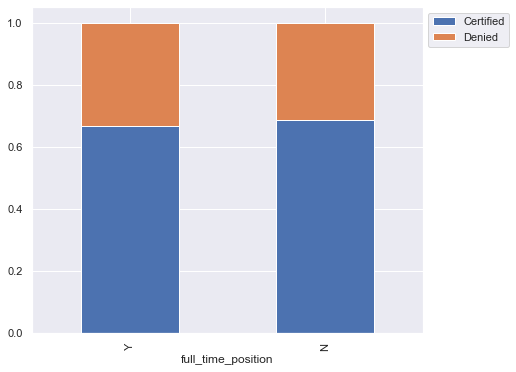

<IPython.core.display.Javascript object>

In [39]:
# Plotting a stacked bar plot of Case_status vs Full_time_position
stacked_barplot(df, "full_time_position", "case_status")

**Observations:**

* The above plot shows that candidates/employees going in for full time work positions or part time work positions are almost at same level of being certified for a visa(that is there is not much difference).
* As seen earlier,more employees were certified for a visa than denied.This still the same case for those applying for full time or part time work positions.

**Q.4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

#### Case_status vs Unit_of_wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


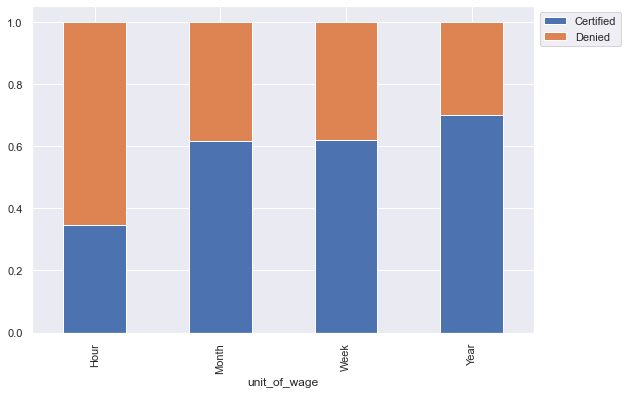

<IPython.core.display.Javascript object>

In [40]:
# Plotting a stacked bar plot of Case_status vs Unit_of_wage
stacked_barplot(df, "unit_of_wage", "case_status")

**Observations:**

The above plot shows that:
* The yearly pay unit is most likely to be certified for a visa as compared to the other pay units(weekly,monthly and hourly pay units).
* The hourly pay unit is the most likely to be denied a visa as compared to other pay units(monthly,weekly and yearly pay units).
* The monthly and weekly pay units are almost at same level of being certified for a visa.

**What are the different educational requirements across regions?**

#### Education_of_employee vs Region_of_employment

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


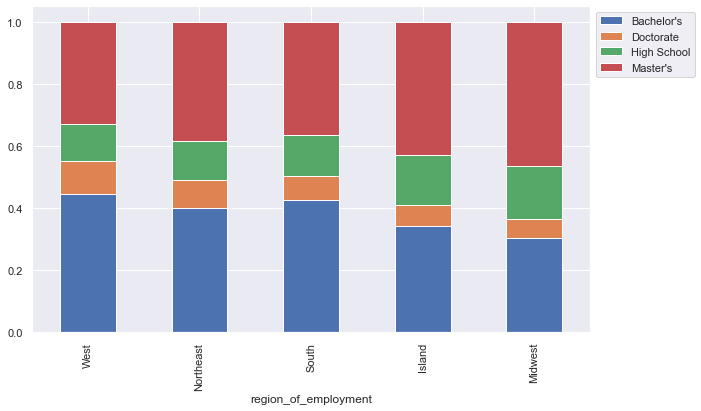

<IPython.core.display.Javascript object>

In [41]:
# Plotting a stacked bar plot of Education_of_employee vs Region_of_employment
stacked_barplot(df, "region_of_employment", "education_of_employee")

**Observations:**

The above plot shows that:
* All the regions **more likely require employees  with a Master's and Bachelor's education** compared to employees with a highschool and doctorate education.
* However,the **least required education** across all regions is the doctorate education.

**Do the employees who have prior work experience require any job training?**

####  Requires_job_training vs Has_job_experience

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


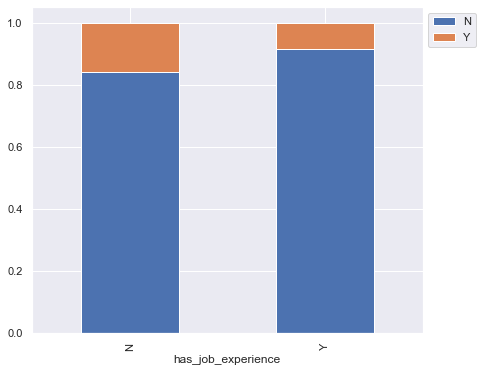

<IPython.core.display.Javascript object>

In [42]:
# Plotting a stacked bar plot of Has_job_experience vs Requires_job_training
stacked_barplot(df, "has_job_experience", "requires_job_training")

**Observations:**

The above plot shows that employees **without prior work experience are more likely to require job training** as compared to employees with work experience.

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Q.5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**


#### Case_status vs Prevailing_wage

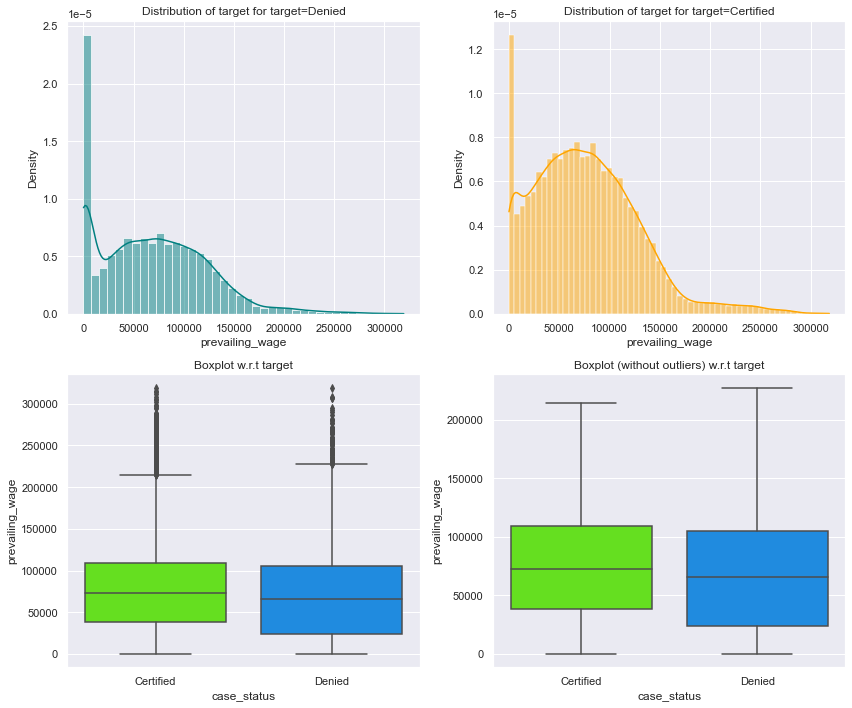

<IPython.core.display.Javascript object>

In [44]:
# Using the function to plot the distribution and boxplot of
# Case_status vs prevailing_wage
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

In [45]:
# Calculating the average prevailing wage with respect to case_status
df.groupby(["case_status"])["prevailing_wage"].mean()

case_status
Certified    77293.619243
Denied       68748.681580
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
* It is seen that the average and median prevailing wage of employees that were certified for a visa is slightly more than the average and median prevailing wage those that were denied the visa.
* There are outliers in boxplots of both class of distributions.

#### Case_status vs No_of_employees

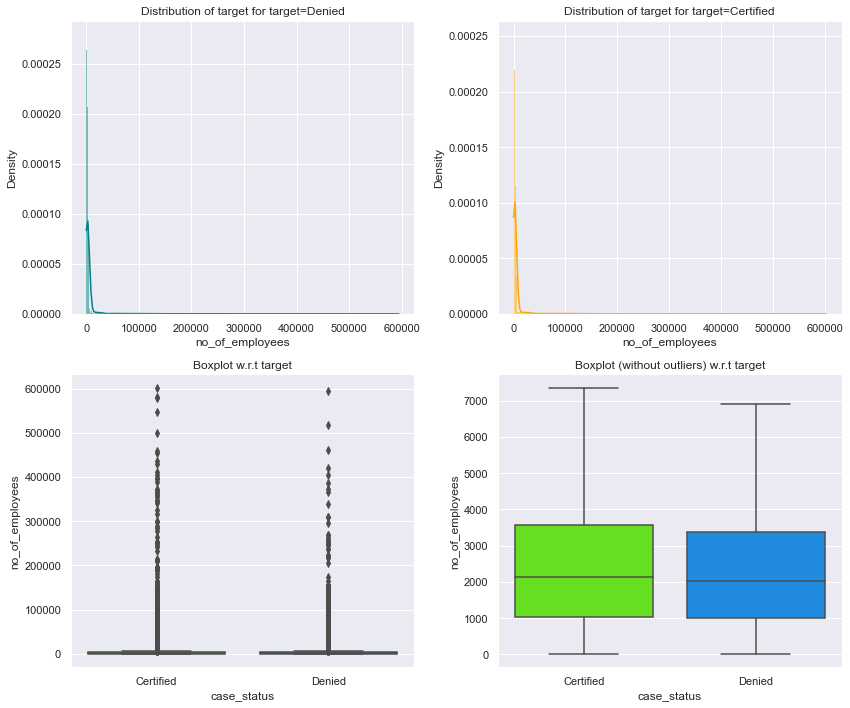

<IPython.core.display.Javascript object>

In [46]:
# Using the function to plot the distribution and boxplot of
# Case_status vs no_of_employees
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

**Observations:**
* Employer's company with a larger number of employees is more likely for its applicants to be certified for a visa.

**Is the prevailing wage same across all the regions of the US**?

#### Region_of_employment vs Prevailing wage

In [47]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df, x="region_of_employment", y=df[x], palette="PuBu")
    plt.show()

<IPython.core.display.Javascript object>

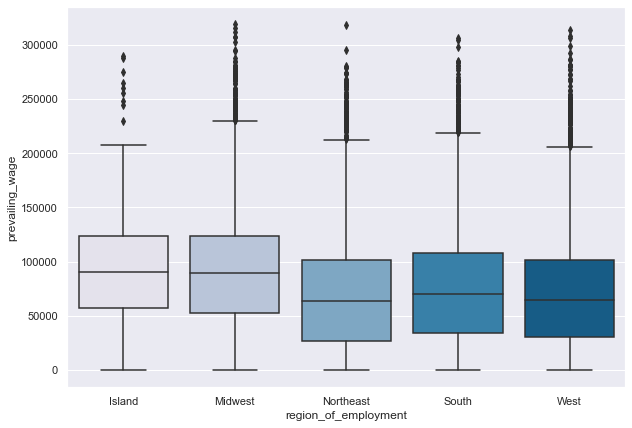

<IPython.core.display.Javascript object>

In [48]:
# Plotting boxplots of Region_of_employment vs Prevailing wage
boxplot("prevailing_wage")

In [49]:
# Calculating the average prevailing wage with respect to region_of_employment
df.groupby(["region_of_employment"])["prevailing_wage"].mean().sort_values(
    ascending=False
)

region_of_employment
Island       91712.750760
Midwest      91696.741794
South        74040.545216
West         69832.628698
Northeast    67872.662819
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
* From the above,it is noticed that prevailing wage varies across different regions of the US.
* Island and Midwest regions of the US have the highest average and median prevailing wage.
* Northeast region have the lowest average prevailing wage.
* Outliers are observed on all regions.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier detection 

**Outliers detection using boxplot**

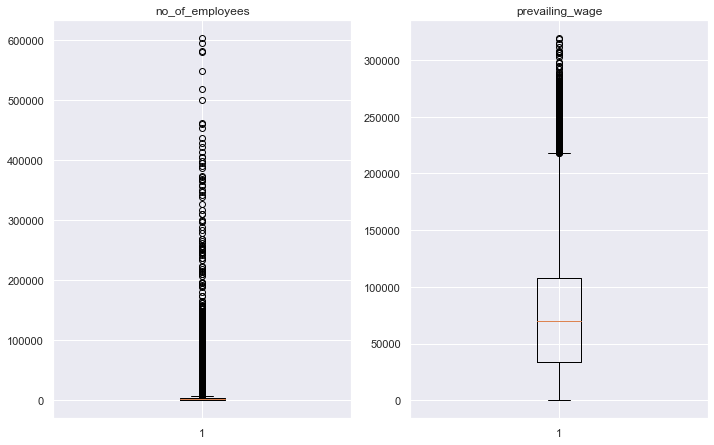

<IPython.core.display.Javascript object>

In [50]:
# Making a list of numerical columns to check for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

# dropping yr_of_estab as it is a temporal variable
numerical_col.remove("yr_of_estab")

# Plotting the boxplots of all numerical columns
for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


**Observations:**
* There are outliers on both no_of_employees and prevailing_wage variable.However,these outliers are quite realistic ,so i'll leave them untreated and build the model with the data as it is.

## Model Building

### Data preparation for modeling

In [51]:
# Defining independent variables/features(X)
X = df.drop(["case_status"], axis=1)

# Creating dummies for X
X = pd.get_dummies(X, drop_first=True)

# Defining the dependent variable(y)
y = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [52]:
# Splitting data into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


<IPython.core.display.Javascript object>

In [53]:
# Printing the unique normalized value counts of the y(dependent) variable.
print("Percentage classes of dependent variable")
print(y.value_counts(1))

# Printing the Percentage classes in training and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage classes of dependent variable
1    0.667896
0    0.332104
Name: case_status, dtype: float64
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting an applicant will be certified for a visa but the applicant should be denied a visa.

2.  Predicting an applicant will be denied a visa but the applicant should be certified for a visa.

#### Which case is more important? 
* Both cases are significant because:

* If we predict that an applicant be certified for a visa but should be denied a visa,then an undeserving employee might occupy the job position while a  US citizen or another foreigner will miss the opportunity to work in that position.

* If we predict that an applicant will be denied a visa but the applicant should be certified for a visa,then the US will lose a talented and qualified individual that can significantly boost the US company in remaining competitive as well as contribute to the US economy.


#### How to reduce the losses (i.e need to reduce False Negatives and False Positives)?
*  `F1 Score` should be maximized.The greater the f1_score higher the chances of identifying both the classes correctly that is minimizing False Negatives and False Positives.

**Defining a function to provide metric scores(accuracy,recall,precision and F1) on train and test set so that we do not have to use the same code repetitively while evaluating models.** 

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

**Defining a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Building a Decision Tree Model

In [56]:
# Defines a decision tree classifier with random state = 1
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)
# Fits the decision tree classifier on the train data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

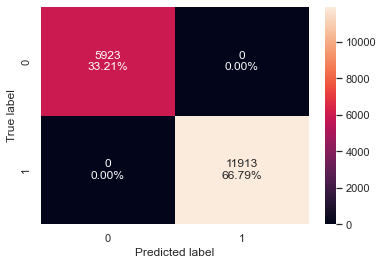

<IPython.core.display.Javascript object>

In [57]:
# Using the function to create confusion matrix of training set
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Applicant got certified for a visa and the model predicted it correctly that is applicant will be certified :  **True Positive (observed=1,predicted=1).In this case above it is 66.79%.**

* Applicant will not be certified for a visa(ie denied visa) and the model predicted applicant will be certified for a visa : **False Positive (observed=0,predicted=1),in this case above,it's 0.00%.**

* Applicant is denied a visa(ie not certified for a visa) and the model predicted it correctly that is applicant will not be certified for a visa : **True Negative (observed=0,predicted=0).In this case above it is 33.21%.**

* Applicant is certified for a visa and the model predicted that the applicant will not be certified for a visa : **False Negative (observed=1,predicted=0).In this case above,it is 0.00%%.**

In [58]:
# Applying the function to calculate different metric scores on training set
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

**Checking model performance on test set**

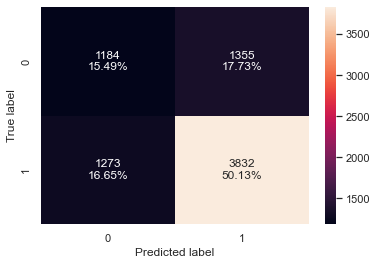

<IPython.core.display.Javascript object>

In [59]:
# Using the function to show confusion matrix of test set
confusion_matrix_sklearn(dtree, X_test, y_test)

In [60]:
# Applying the function to calculate different metric scores on test set
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)

# Printing the different metric scores on test set
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.656201  0.750637    0.73877  0.744656


<IPython.core.display.Javascript object>

**Observations:**
* Decision tree model is working so well on the training data but it is not generalizing well and is performing poorly on the test data As expected,the model is overfitting.
* Accuracy is also quite low on the test set.

#### Hyperparameter Tuning - Decision Tree

In [61]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, scoring=scorer, n_jobs=-1, verbose=2
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

**Checking the tuned model performance on training set**

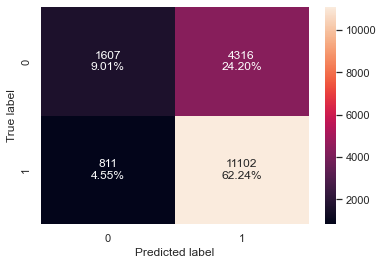

<IPython.core.display.Javascript object>

In [62]:
# Using the function to show confusion matrix on training set
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [63]:
# Applying the function to  calculate different metric scores on training set
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


<IPython.core.display.Javascript object>

**Checking the tuned model performance on test set**

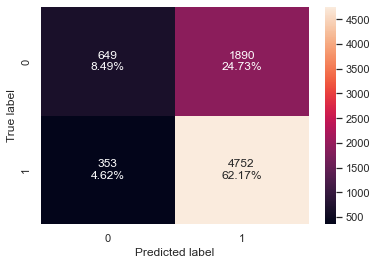

<IPython.core.display.Javascript object>

In [64]:
# Using the function to show confusion matrix on test set
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [65]:
# Applying the function to  calculate different metric scores on test set

dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


<IPython.core.display.Javascript object>

**Observations:**
* Eventhough the accuracy ,recall ,precision and F1 score have dropped on the training set compared to the previous decision tree model with default parameters,the decision tree model with hyperparameter tuning is generalizing well.Overfitting is not oberved.
* The decision tree model after hyperparameter tuning is performing very well in terms of Recall and F1 score on both the training and test sets.However,the accuracy on both training and testing set is low.

###  Bagging Classifier

**Checking model performance on training set**

In [66]:
# Defining bagging classifier with random state = 1
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight="balanced", random_state=1
    ),
    random_state=1,
)
# Fitting bagging classifier on the train data
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

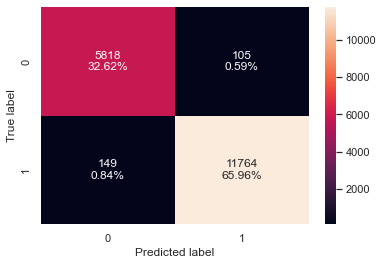

<IPython.core.display.Javascript object>

In [67]:
# Using the function to show confusion matrix on train data
confusion_matrix_sklearn(bagging, X_train, y_train)

In [68]:
# Applying the function to  calculate different metric scores on training set
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.985759  0.987493   0.991153  0.98932


<IPython.core.display.Javascript object>

**Checking model performance on test set**

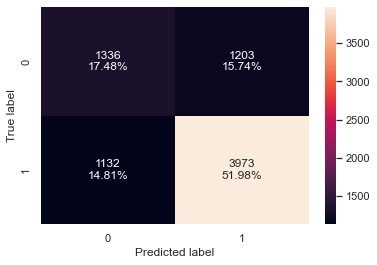

<IPython.core.display.Javascript object>

In [69]:
# Using the function to show confusion matrix on train data
confusion_matrix_sklearn(bagging, X_test, y_test)

In [70]:
# Applying the function to  calculate different metric scores on test set
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
# Printing the different metric scores on test set
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.694532  0.778257   0.767581  0.772882


<IPython.core.display.Javascript object>

**Observations:**
* Bagging classifier is overfitting and is performing poorly on the test set.

#### Hyperparameter Tuning -  Bagging Classifier

In [71]:
%%time
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
param_grid = {'base_estimator':[cl1],"max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
             }
# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator  = grid.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 2min 32s


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

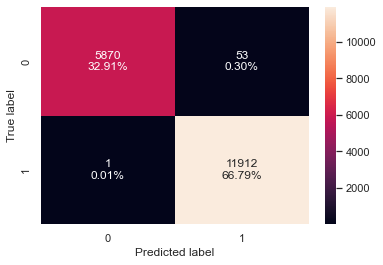

<IPython.core.display.Javascript object>

In [72]:
# Using the function to show confusion matrix on train data
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [73]:
# Applying the function to  calculate different metric scores on training set
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996972  0.999916    0.99557  0.997739


<IPython.core.display.Javascript object>

**Checking model performance on test set**

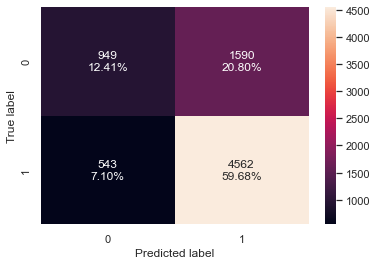

<IPython.core.display.Javascript object>

In [74]:
# Using the function to show confusion matrix on test data
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [75]:
# Applying the function to  calculate different metric scores on test set
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)

# Printing the different metric scores on training set
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720958  0.893634   0.741547  0.810518


<IPython.core.display.Javascript object>

**Observations:**
* The tuned bagging classifier has slightly improved the performance of the model(Accuracy,Recall and F1 score have slightly increased  but Precision on the otherhand has dropped).
* However,the model is overfitting.

### Random Forest

In [76]:
# Defining Random Forest classifier with random state = 1
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
# Fitting Random Forest classifier on the train data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

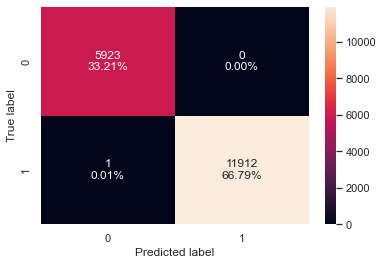

<IPython.core.display.Javascript object>

In [77]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(rf, X_train, y_train)

In [78]:
# Applying the function to  calculate different metric scores on training set
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
# Printing the different metric scores on training set
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


<IPython.core.display.Javascript object>

**Checking model performance on test set**

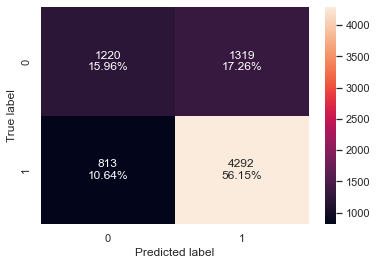

<IPython.core.display.Javascript object>

In [79]:
# Using the function to show confusion matrix on test data
confusion_matrix_sklearn(rf, X_test, y_test)

In [80]:
# Applying the function to  calculate different metric scores on test set
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
# Printing the different metric scores on test set
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.840744   0.764926  0.801045


<IPython.core.display.Javascript object>

**Observations:**
* The random forest model with default parameters is performing well on the training set and not well on the test set.The Random forest model with default parameters is overfitting.
* Accuracy is quite high on the test set in the random forest model compared to the decision tree and bagging classifier models with default parameters.

#### Hyperparameter Tuning -  Random Forest

In [81]:
%%time
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": np.arange(15, 26, 5),
        "max_features": ['log2','auto','sqrt'],
         "min_samples_split": [5, 7],
         "max_depth": list(np.arange(5, 15, 5)),}
         
# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer,cv=5, n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 19.3 s


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=25, random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

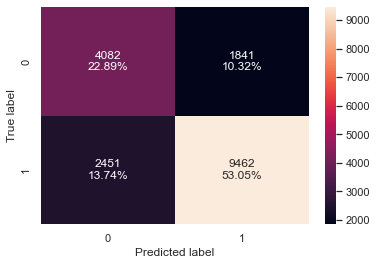

<IPython.core.display.Javascript object>

In [82]:
# Using the function to show confusion matrix on train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [83]:
# Applying the function to  calculate different metric scores on training set
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.759363  0.794258   0.837123  0.815127


<IPython.core.display.Javascript object>

**Checking model performance on test set**

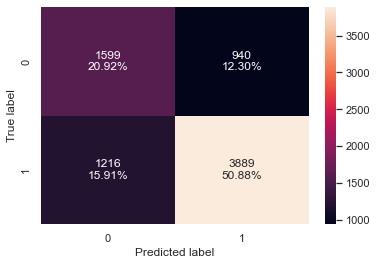

<IPython.core.display.Javascript object>

In [84]:
# Using the function to show confusion matrix on test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [85]:
# Applying the function to  calculate different metric scores on test set
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
# Printing the different metric scores on training set
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.717949  0.761802   0.805343  0.782968


<IPython.core.display.Javascript object>

**Observations:**
* Overfitting on the random forest model with hyperparameter tuning has reduced but it is not perfoming  well on test set in terms of f1 score,Recall and Accuracy.

###  AdaBoost Classifier

In [86]:
# Defining AdaBoost classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)
# Fitting the model on train data
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

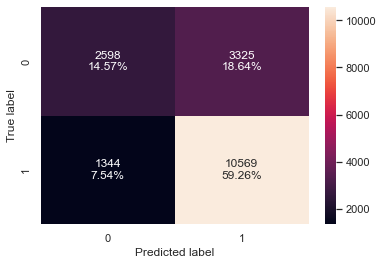

<IPython.core.display.Javascript object>

In [87]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [88]:
# Applying the function to  calculate different metric scores on training set
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


<IPython.core.display.Javascript object>

**Checking model performance on test set**

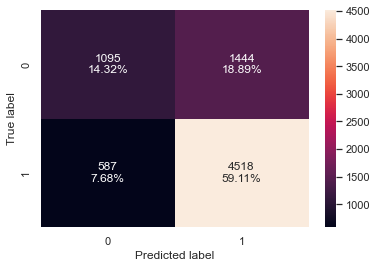

<IPython.core.display.Javascript object>

In [89]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [90]:
# Applying the function to  calculate different metric scores on test set
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)

# Printing the different metric scores on test set
print("Test performance \n", ab_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


<IPython.core.display.Javascript object>

**Observations:**
* Adaboost is giving more generalized performance than previous models but the test Accuracy and Precision is quite lower than the Recall and  f1-score.

#### Hyperparameter Tuning - AdaBoost Classifier

In [91]:
%%time
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,class_weight="balanced", random_state=1),DecisionTreeClassifier(max_depth=2,class_weight="balanced", random_state=1),
                      DecisionTreeClassifier(max_depth=3,class_weight="balanced", random_state=1)],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate":np.arange(0.1, 0.4, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 3min 20s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

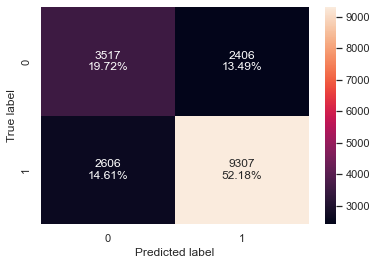

<IPython.core.display.Javascript object>

In [92]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [93]:
# Applying the function to  calculate different metric scores on training set
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
# Printing the different metric scores on training set
print("Training performance \n", abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


<IPython.core.display.Javascript object>

**Checking model performance on test set**

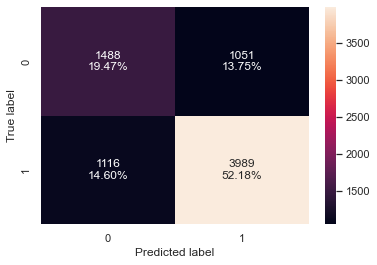

<IPython.core.display.Javascript object>

In [94]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [95]:
# Applying the function to  calculate different metric scores on test set
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance \n", abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


<IPython.core.display.Javascript object>

**Observations:**
* Surprisingly, even though the  model is generalizing well,the performance has slightly decreased in terms of f1 score,Accuracy and Recall after hyperparameter tuning.On the otherhand,Precision has slightly increased on this model.

###  Gradient Boosting Classifier

In [96]:
# Defining Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fitting the model on the train data
gb_classifier.fit(X_train,y_train)


GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

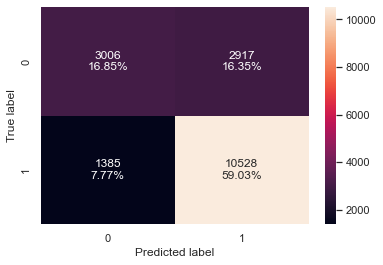

<IPython.core.display.Javascript object>

In [97]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [98]:
# Applying the function to  calculate different metric scores on training set
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance:\n", gb_classifier_model_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


<IPython.core.display.Javascript object>

**Checking model performance on test set**

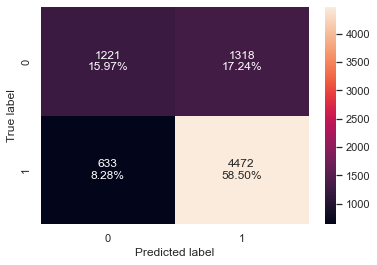

<IPython.core.display.Javascript object>

In [99]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [100]:
# Applying the function to  calculate different metric scores on test set
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance \n", gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


<IPython.core.display.Javascript object>

**Observations:**
* The gradient boosting classifier is giving quite a generalized performance and a better f1 score than previous models.

#### Hyperparameter Tuning - Gradient Boosting Classifier

In [101]:
%%time
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "n_estimators":[200, 250],
    "subsample":[0.9, 1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5 , n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 3min 52s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

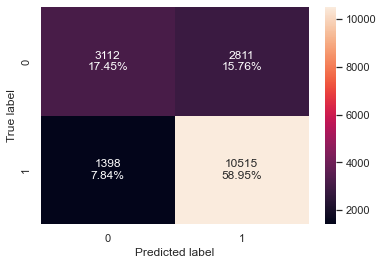

<IPython.core.display.Javascript object>

In [102]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [103]:
# Applying the function to  calculate different metric scores on training set
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance:\n", gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


<IPython.core.display.Javascript object>

**Checking model performance on test set**

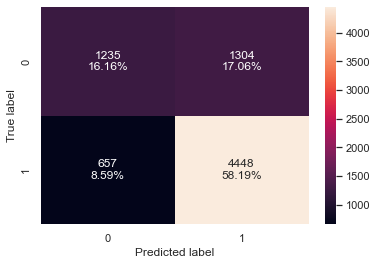

<IPython.core.display.Javascript object>

In [104]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [105]:
# Applying the function to  calculate different metric scores on test set
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
# Printing the different metric scores on test set
print("Testing performance:\n", gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


<IPython.core.display.Javascript object>

**Observations:**
* There is not much difference in the performance of the gradient boosting classifier model  after hyperparameter tuning.


###  XGBoost Classifier

In [106]:
# Defining XGBoost Classifier with random state = 1
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")

# Fitting the model on the train data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

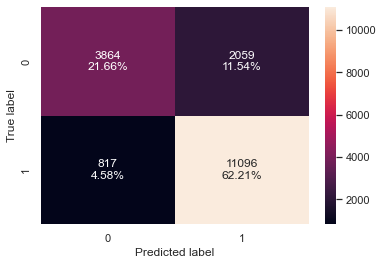

<IPython.core.display.Javascript object>

In [107]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [108]:
# Applying the function to  calculate different metric scores on training set
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance:\n", xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


<IPython.core.display.Javascript object>

**Checking model performance on test set**

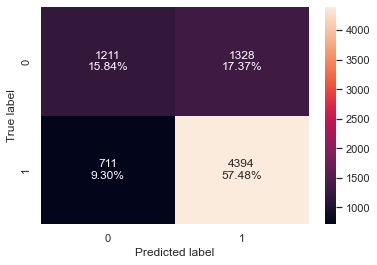

<IPython.core.display.Javascript object>

In [109]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [110]:
# Applying the function to  calculate different metric scores on test set
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance:\n", xgb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


<IPython.core.display.Javascript object>

**Observations:**
* XGBoost classifier is overfitting the training data.

#### Hyperparameter Tuning - XGBoost Classifier

In [111]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight":[1, 2],
    "subsample":[0.9,1],
    "learning_rate":np.arange(0.1, 0.21, 0.1),
    "colsample_bytree":[0.8, 0.9],
    "colsample_bylevel":[0.9, 1],
    "gamma": [3, 5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5 , n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Wall time: 22min 6s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance on training set**

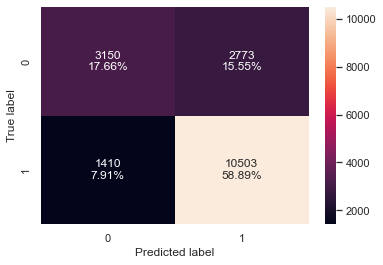

<IPython.core.display.Javascript object>

In [112]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [113]:
# Applying the function to  calculate different metric scores on training set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance:\n", xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.765474  0.881642   0.791127  0.833935


<IPython.core.display.Javascript object>

**Checking model performance on test set**

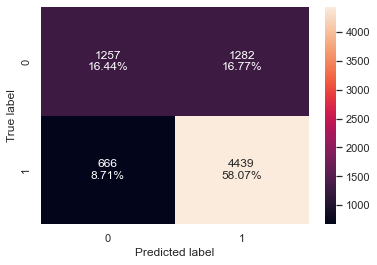

<IPython.core.display.Javascript object>

In [114]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [115]:
# Applying the function to  calculate different metric scores on test set
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance:\n", xgb_tuned_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0   0.74516  0.86954   0.775913  0.820063


<IPython.core.display.Javascript object>

**Observations:**
* There is no overfitting  on the XGBoost Classifier with hyperparameter tuning but there is not much difference in the model performance.

### Stacking Classifier

In [116]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,...
                                                 gpu_id=-1,
                                             

<IPython.core.display.Javascript object>

**Checking model performance on training set**

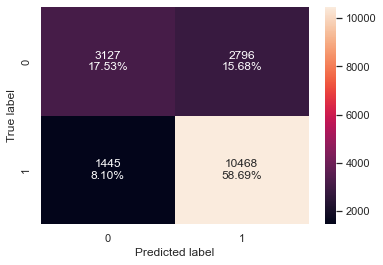

<IPython.core.display.Javascript object>

In [117]:
# Using the function to create confusion matrix on train data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [118]:
# Applying the function to  calculate different metric scores on training set
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)

# Printing the different metric scores on training set
print("Training performance:\n", stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.762222  0.878704   0.789204  0.831553


<IPython.core.display.Javascript object>

**Checking model performance on test set**

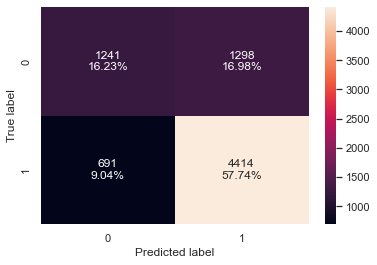

<IPython.core.display.Javascript object>

In [119]:
# Using the function to create confusion matrix on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [120]:
# Applying the function to  calculate different metric scores on test set
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)

# Printing the different metric scores on test set
print("Testing performance:\n", stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739796  0.864643   0.772759  0.816123


<IPython.core.display.Javascript object>

**Observations:**
* The stacking classifier is giving a quite similar performance as compared to XGBoost with slightly less overfitting.

## Model Performance Comparison and Conclusions

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.999944,0.759363,0.985759,0.996972,0.738226,0.718995,0.758802,0.764017,0.838753,0.765474,0.762222
Recall,1.0,0.931923,0.999916,0.794258,0.987493,0.999916,0.887182,0.781247,0.883740,0.882649,0.931419,0.881642,0.878704
Precision,1.0,0.720067,1.000000,0.837123,0.991153,0.995570,0.760688,0.794587,0.783042,0.789059,0.843482,0.791127,0.789204
F1,1.0,0.812411,0.999958,0.815127,0.989320,0.997739,0.819080,0.787861,0.830349,0.833234,0.885272,0.833935,0.831553


<IPython.core.display.Javascript object>

In [122]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.656201,0.706567,0.721088,0.717949,0.694532,0.720958,0.734301,0.716510,0.744767,0.743459,0.733255,0.745160,0.739796
Recall,0.750637,0.930852,0.840744,0.761802,0.778257,0.893634,0.885015,0.781391,0.876004,0.871303,0.860725,0.869540,0.864643
Precision,0.738770,0.715447,0.764926,0.805343,0.767581,0.741547,0.757799,0.791468,0.772366,0.773296,0.767913,0.775913,0.772759
F1,0.744656,0.809058,0.801045,0.782968,0.772882,0.810518,0.816481,0.786397,0.820927,0.819379,0.811675,0.820063,0.816123


<IPython.core.display.Javascript object>

**Observations:**
* The gradient boost classifier model is the best model here. It has the highest f1-score and the second highest Accuracy on the test data and it is not overfitting the training data.
* The Gradient boost classifier, the tuned XGBoost classifier, and stacking classifier  are the top 3 models. They are all giving a quite similar performance.

### Feature importance of Gradient Boosting Classifier(final model) 

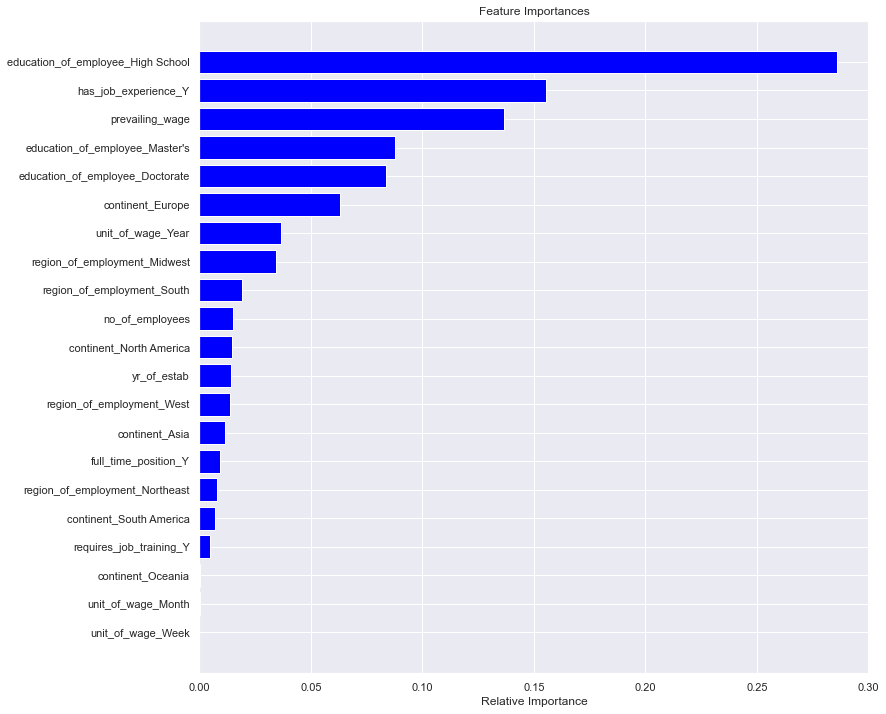

<IPython.core.display.Javascript object>

In [123]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- Education_of_employee_highschool is the most important feature that significantly influences the case status followed by has_job_experience_Y,prevailing_wage and education_of_employee_Master's.

### Conclusion:
* Based on our analysis,the suitable profile for the applicants with highest chances of being certified for a visa are those that: 
  - have an educational certificate  above highschool (those that have master's or doctorate have a  greater chance).
  - have work experience
  - have a considerable high yearly prevailing wage(that is from 80000dollars   and above)
  - are coming from Europe 
  - intends to be employed in the Midwest region and the South region of US
  - go in for full time work positions
  - require a job training



## Actionable Insights and Recommendations
* Inorder to facilitate the process of visa approvals,EasyVisa should target more applicants that have at master's or doctorate degrees with work experience and are applying for full time work positions as those with highschool certificates have very high chances of being denied a visa.
* EasyVisa should also target employers seeking employees to work in the Midwest and South Regions of the US as these regions were shown to have higher chances of their applicants to be certified for a visa.
* EasyVisa should further investigate applications for the Island region though having a considerable high prevailing wage had higher chances of being denied a visa.
* EasyVisa should also target applicants coming from Europe and Africa as these profiles have a higher chance to be certified for a visa.
* Applicants coming from South America should be toroughly and keenly reviewed and made sure they have very strong profile(that is have at least master's degree,many years of work experience,going in for a full time position with a quite high yearly prevailing wage,etc).For applicants from this continent have a higher chance of being denied a visa. 
* Applications from companies with larger number of employees should be targeted as their applicants are more likely to be certified for a visa.